Here we are building and analyzing a Bayesian Network (BN) to model and infer relationships between different variables in a hypothetical student performance scenario. The network represents probabilistic dependencies and causal relationships among variables like Difficulty (D), Intelligence (I), Grade (G), SAT score (S), and Recommendation Letter (L).

In [ ]:
!pip install pgmpy
!apt-get install graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import pgmpy
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from graphviz import Digraph
from IPython.display import Image

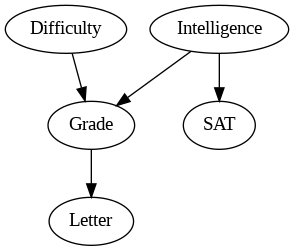

In [ ]:
# Define the Bayesian Network structure
dot = Digraph()

# Add nodes
dot.node('D', 'Difficulty')
dot.node('I', 'Intelligence')
dot.node('G', 'Grade')
dot.node('S', 'SAT')
dot.node('L', 'Letter')

# Add edges
dot.edges([('D', 'G'), ('I', 'G'), ('I', 'S'), ('G', 'L')])

# Render the graph as markdown
dot.format = 'png'
dot.render('students_bn', cleanup=True)

# Display the graph
from IPython.display import Image
Image(filename='students_bn.png')

In [ ]:
# Define the structure of the Bayesian Network
student_bn = BayesianNetwork([
    ('D', 'G'),  # Difficulty influences Grade
    ('I', 'G'),  # Intelligence influences Grade
    ('I', 'S'),  # Intelligence influences SAT
    ('G', 'L')   # Grade influences Letter
])

# Define the Conditional Probability Distributions (CPTs)

# CPT for Difficulty (D)
cpd_d = TabularCPD(variable='D', variable_card=2, values=[[0.6], [0.4]])  # P(D=0)=0.6, P(D=1)=0.4

# CPT for Intelligence (I)
cpd_i = TabularCPD(variable='I', variable_card=2, values=[[0.7], [0.3]])  # P(I=0)=0.7, P(I=1)=0.3

# CPT for SAT (S) given Intelligence (I)
cpd_s = TabularCPD(variable='S', variable_card=2,
                   values=[[0.95, 0.2],  # P(S=0 | I=0)=0.95, P(S=0 | I=1)=0.2
                           [0.05, 0.8]], # P(S=1 | I=0)=0.05, P(S=1 | I=1)=0.8
                   evidence=['I'], evidence_card=[2])

# CPT for Grade (G) given Difficulty (D) and Intelligence (I)
cpd_g = TabularCPD(variable='G', variable_card=3,
                   values=[[0.3, 0.05, 0.9, 0.5],  # P(G=A | D=0, I=0)=0.3, etc.
                           [0.4, 0.25, 0.08, 0.3],
                           [0.3, 0.7, 0.02, 0.2]],
                   evidence=['D', 'I'], evidence_card=[2, 2])

# CPT for Letter (L) given Grade (G)
cpd_l = TabularCPD(variable='L', variable_card=2,
                   values=[[0.1, 0.4, 0.99],  # P(L=0 | G=A)=0.1, etc.
                           [0.9, 0.6, 0.01]], # P(L=1 | G=A)=0.9, etc.
                   evidence=['G'], evidence_card=[3])

# Add the CPDs to the model
student_bn.add_cpds(cpd_d, cpd_i, cpd_s, cpd_g, cpd_l)

# Check if the model is valid
assert student_bn.check_model(), "Bayesian Network model is invalid!"

# Perform Inference
inference = VariableElimination(student_bn)

**Key Idea**

-   If $X$ and $Y$ are **independent**, then: $$P(X∣Y)=P(X)$$
-   If $X$ and $Y$ are **conditionally independent given some set Z**, then: $$P(X∣Y,Z)=P(X∣Z)$$

By checking if $P(X∣Y)$ and $P(X)$ are the same, you can determine whether $Y$ influences $X$.



When can $X$ influence $Y$ and vice versa ?

1. $X -> Y$ Yes
2. $Y -> X$ Yes

We should see
1. $P(X|Y) != P(X)$
2. $P(Y|X) != P(Y)$

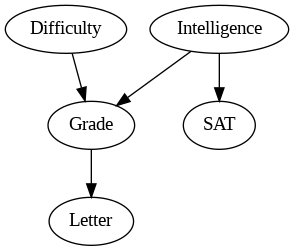

In [ ]:
Image(filename='students_bn.png')

In [ ]:
result = inference.query(variables=['D'], evidence={'G': 0})
print("     P(D|G=0):", "\n", result)
result = inference.query(variables=['D'])
print("     P(D):", "\n", result)
print('-------------------------------------------------------------')
print('-------------------------------------------------------------')
result = inference.query(variables=['G'], evidence={'D': 0})
print("     P(G|D=0):", "\n", result)
result = inference.query(variables=['G'])
print("     P(G):", "\n", result)
print('-------------------------------------------------------------')
print('-------------------------------------------------------------')
result = inference.query(variables=['G'], evidence={'I': 0})
print("     P(G|I=0):", "\n", result)
result = inference.query(variables=['G'])
print("     P(G):", "\n", result)

     P(D|G=0): 
 +------+----------+
| D    |   phi(D) |
+======+==========+
| D(0) |   0.3020 |
+------+----------+
| D(1) |   0.6980 |
+------+----------+
     P(D): 
 +------+----------+
| D    |   phi(D) |
+======+==========+
| D(0) |   0.6000 |
+------+----------+
| D(1) |   0.4000 |
+------+----------+
-------------------------------------------------------------
-------------------------------------------------------------
     P(G|D=0): 
 +------+----------+
| G    |   phi(G) |
+======+==========+
| G(0) |   0.2250 |
+------+----------+
| G(1) |   0.3550 |
+------+----------+
| G(2) |   0.4200 |
+------+----------+
     P(G): 
 +------+----------+
| G    |   phi(G) |
+======+==========+
| G(0) |   0.4470 |
+------+----------+
| G(1) |   0.2714 |
+------+----------+
| G(2) |   0.2816 |
+------+----------+
-------------------------------------------------------------
-------------------------------------------------------------
     P(G|I=0): 
 +------+----------+
| G    |   phi(

Suppose $W$ ∉ $D$, the set of evidences

3. $X \rightarrow W \rightarrow Y$ Yes!
4. $X \leftarrow W \leftarrow Y$ Yes!
5. $X \leftarrow W \rightarrow Y$ Yes!


By checking if $P(X|Y)$ and $P(X)$ are the same, you can determine whether $Y$ influences $X$.

---

**Structure 3: $X \rightarrow W \rightarrow Y$**

- $X$ influences $Y$ through the intermediate variable $W$.
- If $W \notin D$ (not observed), $X$ and $Y$ are **dependent**, because the path $X \to W \to Y$ is open.
- In this case, $P(X|Y) \neq P(X)$ since $Y$ provides information about $X$ via $W$.

---

**Structure 4: $X \leftarrow W \leftarrow Y$**

- $W$ is a common cause of both $X$ and $Y$.
- If $W \notin D$ (not observed), $X$ and $Y$ are **dependent**, because the path $X \leftarrow W \leftarrow Y$ is open.
- Here too, $P(X|Y) \neq P(X)$, as $Y$ provides information about $X$ via their shared cause $W$.

---

**Structure 5: $X \leftarrow W \to Y$**

- $W$ is a common cause of $X$ and $Y$.
- If $W \notin D$, $X$ and $Y$ are **dependent**, because the path $X \leftarrow W \to Y$ is open.
- Similarly, $P(X|Y) \neq P(X)$, as $Y$ provides information about $X$ via $W$.


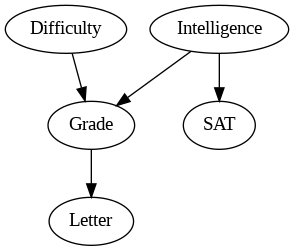

In [ ]:
Image(filename='students_bn.png')

In [ ]:
# Difficulty --> not(Grade) --> Letter
result = inference.query(variables=['L'], evidence={'D': 0})
print("     P(L|D=0):", "\n", result)
result = inference.query(variables=['L'])
print("     P(L):", "\n", result)
print('-------------------------------------------------------------')
print('-------------------------------------------------------------')
# Letter <-- not(Grade) <-- Intellegence
result = inference.query(variables=['I'], evidence={'L': 0})
print("     P(I|L=0):", "\n", result)
result = inference.query(variables=['D'])
print("     P(I):", "\n", result)
print('-------------------------------------------------------------')
print('-------------------------------------------------------------')
# Grade <- Intellegence --> SAT
result = inference.query(variables=['G'], evidence={'S': 0})
print("     P(G|S=0):", "\n", result)
result = inference.query(variables=['G'])
print("     P(G):", "\n", result)

     P(L|D=0): 
 +------+----------+
| L    |   phi(L) |
+======+==========+
| L(0) |   0.5803 |
+------+----------+
| L(1) |   0.4197 |
+------+----------+
     P(L): 
 +------+----------+
| L    |   phi(L) |
+======+==========+
| L(0) |   0.4320 |
+------+----------+
| L(1) |   0.5680 |
+------+----------+
-------------------------------------------------------------
-------------------------------------------------------------
     P(I|L=0): 
 +------+----------+
| I    |   phi(I) |
+======+==========+
| I(0) |   0.5653 |
+------+----------+
| I(1) |   0.4347 |
+------+----------+
     P(I): 
 +------+----------+
| D    |   phi(D) |
+======+==========+
| D(0) |   0.6000 |
+------+----------+
| D(1) |   0.4000 |
+------+----------+
-------------------------------------------------------------
-------------------------------------------------------------
     P(G|S=0): 
 +------+----------+
| G    |   phi(G) |
+======+==========+
| G(0) |   0.5143 |
+------+----------+
| G(1) |   0.27

**Key Idea**

- If $X$ and $Y$ are **independent**, then:
  $$
  P(X|Y) = P(X)
  $$
- If $X$ and $Y$ are **conditionally independent given some set $Z$**, then:
  $$
  P(X|Y,Z) = P(X|Z)
  $$

When $W \in D$ (observed), the variable $W$ is part of the evidence, and it can block dependency paths between $X$ and $Y$ in the following structures:

---

**Structure 3: $X \to W \to Y$**

- $X$ influences $Y$ through the intermediate variable $W$.
- If $W \in D$ (observed), $X$ and $Y$ are **conditionally independent** because the information flow through $W$ is "blocked."
- In this case:
  $$
  P(X|Y, W) = P(X|W)
  $$
  This means $Y$ provides no additional information about $X$ beyond $W$, so $P(X|Y) = P(X)$ after conditioning on $W$.

---

**Structure 4: $X \leftarrow W \leftarrow Y$**

- $W$ is a common cause of both $X$ and $Y$.
- If $W \in D$ (observed), $X$ and $Y$ are **conditionally independent** because the shared dependence on $W$ is fully accounted for by observing $W$.
- In this case:
  $$
  P(X|Y, W) = P(X|W)
  $$
  Thus, $P(X|Y)$ and $P(X)$ are equal after conditioning on $W$.

---

**Structure 5: $X \leftarrow W \to Y$**

- $W$ is a common cause of $X$ and $Y$.
- If $W \in D$ (observed), $X$ and $Y$ are **conditionally independent** because observing $W$ blocks the dependency path.
- In this case:
  $$
  P(X|Y, W) = P(X|W)
  $$
  Again, $P(X|Y)$ and $P(X)$ are equal after conditioning on $W$.

---

When $W \in D$ (observed):
- For all structures ($X \to W \to Y$, $X \leftarrow W \leftarrow Y$, $X \leftarrow W \to Y$), $X$ and $Y$ are **conditionally independent** given $W$.
- This means that $P(X|Y) = P(X)$ after accounting for $W$.

Checking this programmatically in a Bayesian Network would involve verifying that the conditional independence relationships hold by querying $P(X|Y, W)$ and $P(X|W)$ and confirming they are the same. Let me know if you'd like a code example!


In [ ]:
# Difficulty --> given(Grade) --> Letter
result = inference.query(variables=['L'], evidence={'D': 0, 'G':0})
print("     P(L|D=0,G=0):", "\n", result)
result = inference.query(variables=['L'], evidence={'G':0})
print("     P(L|G=0):", "\n", result)
print('-------------------------------------------------------------')
print('-------------------------------------------------------------')
# Letter <-- given(Grade) <-- Intellegence
result = inference.query(variables=['I'], evidence={'L': 1, 'G':0})
print("     P(I|L=1,G=0):", "\n", result)
result = inference.query(variables=['I'], evidence={'G':0})
print("     P(I|G=0):", "\n", result)
print('-------------------------------------------------------------')
print('-------------------------------------------------------------')
# Grade <- given(Intellegence) --> SAT
result = inference.query(variables=['G'], evidence={'S': 0, 'I':1})
print("     P(G|S=0, I=1):", "\n", result)
result = inference.query(variables=['G'], evidence={'I':1})
print("     P(G|I=1):", "\n", result)

     P(L|D=0,G=0): 
 +------+----------+
| L    |   phi(L) |
+======+==========+
| L(0) |   0.1000 |
+------+----------+
| L(1) |   0.9000 |
+------+----------+
     P(L|G=0): 
 +------+----------+
| L    |   phi(L) |
+======+==========+
| L(0) |   0.1000 |
+------+----------+
| L(1) |   0.9000 |
+------+----------+
-------------------------------------------------------------
-------------------------------------------------------------
     P(I|L=1,G=0): 
 +------+----------+
| I    |   phi(I) |
+======+==========+
| I(0) |   0.8456 |
+------+----------+
| I(1) |   0.1544 |
+------+----------+
     P(I|G=0): 
 +------+----------+
| I    |   phi(I) |
+======+==========+
| I(0) |   0.8456 |
+------+----------+
| I(1) |   0.1544 |
+------+----------+
-------------------------------------------------------------
-------------------------------------------------------------
     P(G|S=0, I=1): 
 +------+----------+
| G    |   phi(G) |
+======+==========+
| G(0) |   0.2300 |
+------+------

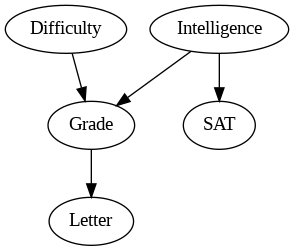

In [ ]:
Image(filename='students_bn.png')

**Structure 6: $X \to W \leftarrow Y$**

- $W$ is a common effect (a "collider") of both $X$ and $Y$.
- The dependency between $X$ and $Y$ depends on the observation of $W$ or its descendants:
  - **Yes**, $X$ and $Y$ are conditionally independent if:
    - $W \in D$ (observed) and
    - None of $W$'s descendants are observed.
  - **No**, $X$ and $Y$ are dependent if:
    - $W \in D$ (observed) and at least one of $W$'s descendants is also observed.

In [ ]:
# Difficulty --> Grade <-- Intellegence
result = inference.query(variables=['D'], evidence={'G':0, 'I': 1})
print("     P(D|G=0,I=1):", "\n", result)
result = inference.query(variables=['D'], evidence={'I':1})
print("     P(D|I=1):", "\n", result)
print('-------------------------------------------------------------')
print('-------------------------------------------------------------')
print("Say G or its Descendants are not observed, then ")
result = inference.query(variables=['D'], evidence={'I': 1})
print("     P(D|I=1):", "\n", result)
result = inference.query(variables=['D'])
print("     P(D):", "\n", result)
print('-------------------------------------------------------------')
print('-------------------------------------------------------------')
print("Say the descendant, L is observed, then ")
result = inference.query(variables=['D'], evidence={'I': 1, 'L':0})
print("     P(D|I=1,L=0):", "\n", result)
result = inference.query(variables=['D'], evidence={'L':0})
print("     P(D|L=0):", "\n", result)

     P(D|G=0,I=1): 
 +------+----------+
| D    |   phi(D) |
+======+==========+
| D(0) |   0.1304 |
+------+----------+
| D(1) |   0.8696 |
+------+----------+
     P(D|I=1): 
 +------+----------+
| D    |   phi(D) |
+======+==========+
| D(0) |   0.6000 |
+------+----------+
| D(1) |   0.4000 |
+------+----------+
-------------------------------------------------------------
-------------------------------------------------------------
Say G or its Descendants are not observed, then 
     P(D|I=1): 
 +------+----------+
| D    |   phi(D) |
+======+==========+
| D(0) |   0.6000 |
+------+----------+
| D(1) |   0.4000 |
+------+----------+
     P(D): 
 +------+----------+
| D    |   phi(D) |
+======+==========+
| D(0) |   0.6000 |
+------+----------+
| D(1) |   0.4000 |
+------+----------+
-------------------------------------------------------------
-------------------------------------------------------------
Say the descendant, L is observed, then 
     P(D|I=1,L=0): 
 +------+-----